# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('table', attrs={'class': 'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Finding row length.

In [5]:
cek_row = table.find_all('tr')
row_length = len('cek_row')

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
web_address = "https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel"
web_content = requests.get(web_address).text
web_content_soup = BeautifulSoup(web_content, "html.parser")

table_ethereum = web_content_soup.find('table', attrs={'class': 'table table-striped text-sm text-lg-normal'})

list_ethereum = []

for table_rows in table_ethereum.find_all('tr'):
    # Find Header Date
    header_date = table_rows.find('th', attrs={'class': 'font-semibold text-center'})
    if(header_date) != None:
        periode = header_date.text.replace("-", "/")
        
    # Find record
    column_iteration = 0
    for table_columns in table_rows.find_all('td'):
        
        if (column_iteration) == 0:
            market_cap = table_columns.text.replace("$", "").replace(",", "").strip()
        elif (column_iteration) == 1:
            volume = table_columns.text.replace("$", "").replace(",", "").strip()
        elif (column_iteration) == 2:
            open_price = table_columns.text.replace("$", "").replace(",", "").strip()
        elif (column_iteration) == 3:
            close = table_columns.text.replace("$", "").replace(",", "").strip()
        
        if column_iteration == 3:
            list_ethereum.append((periode,market_cap, volume, open_price, close))
        
        column_iteration += 1

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd
df_ethereum = pd.DataFrame(list_ethereum, columns = ('periode','market_cap','volume', 'open_price', 'close'))

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format
df_ethereum['periode'] = df_ethereum['periode'].astype('datetime64')
df_ethereum['market_cap'] = df_ethereum['market_cap'].astype('float64')
df_ethereum['volume'] = df_ethereum['volume'].astype('float64')
df_ethereum['open_price'] = df_ethereum['open_price'].astype('float64')
df_ethereum = df_ethereum.set_index('periode')
df_ethereum['volume'] = df_ethereum['volume']
df_ethereum


# df_ethereum['market_cap'] = df_ethereum['market_cap'] / 1000000

,market_cap,volume,open_price,close
periode,,,,
2021-06-30,"253,607,549,372.0","27,149,143,847.0","2,169.4",N/A
2021-06-29,"243,040,539,437.0","30,629,329,806.0","2,087.52",2169.40
2021-06-28,"229,354,016,311.0","24,316,408,028.0","1,973.93",2087.52
2021-06-27,"209,989,265,221.0","24,249,510,321.0","1,817.05",1973.93
2021-06-26,"213,871,849,532.0","25,981,381,067.0","1,833.46",1817.05
...,...,...,...,...
2020-01-05,"14,636,213,160.0","6,958,393,690.0",134.14,135.01
2020-01-04,"14,613,194,776.0","9,655,245,100.0",133.7,134.14
2020-01-03,"13,859,793,330.0","6,497,297,884.0",127.05,133.70


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [9]:
df_ethereum.describe()

,market_cap,volume,open_price
count,547.0,547.0,547.0
mean,"101,899,408,252.31993","22,445,152,287.500916",888.2373674588665
std,"108,160,854,457.81505","18,124,898,886.153133",930.6039143943557
min,"11,956,631,650.0","4,344,879,746.0",110.6
25%,"25,227,161,727.0","10,407,036,379.0",227.845
50%,"43,692,767,478.0","15,033,855,133.0",387.72
75%,"182,471,777,466.0","30,944,266,718.5","1,580.5300000000002"
max,"481,380,994,613.0","140,906,534,191.0","4,182.79"


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='periode'>

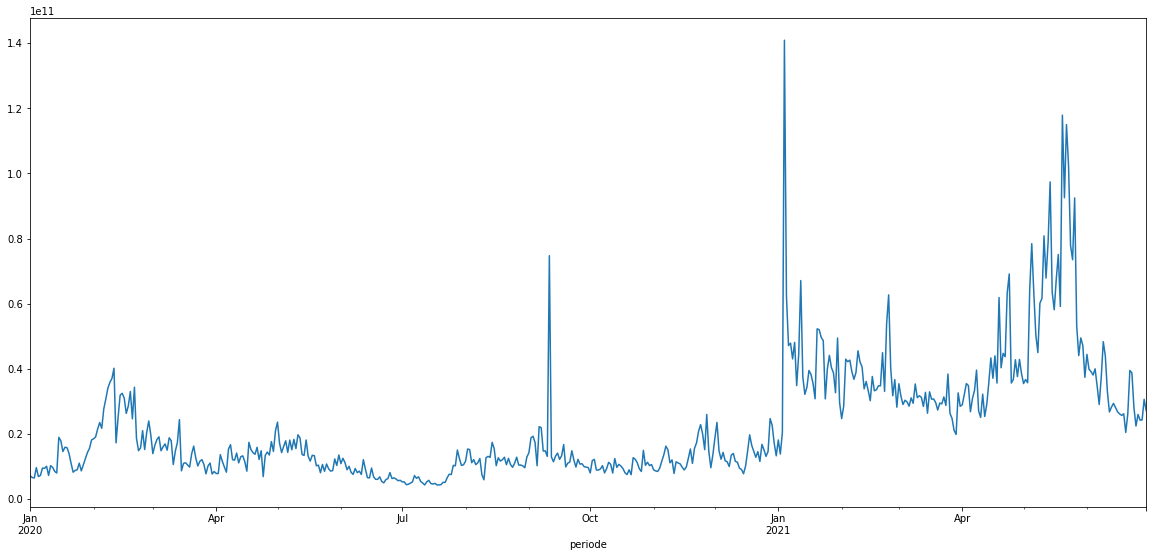

In [10]:
df_ethereum['volume'].plot(figsize = (20,9))

Dari chart diatas, terlihat volume transaksi ethereum sempat menyentuh rekor tertinggi pada Jan 2021 dan juga sepanjang 2021, transaksi etherum relatif lebih tinggi dibandingkan tahun 2020.  

<AxesSubplot:>

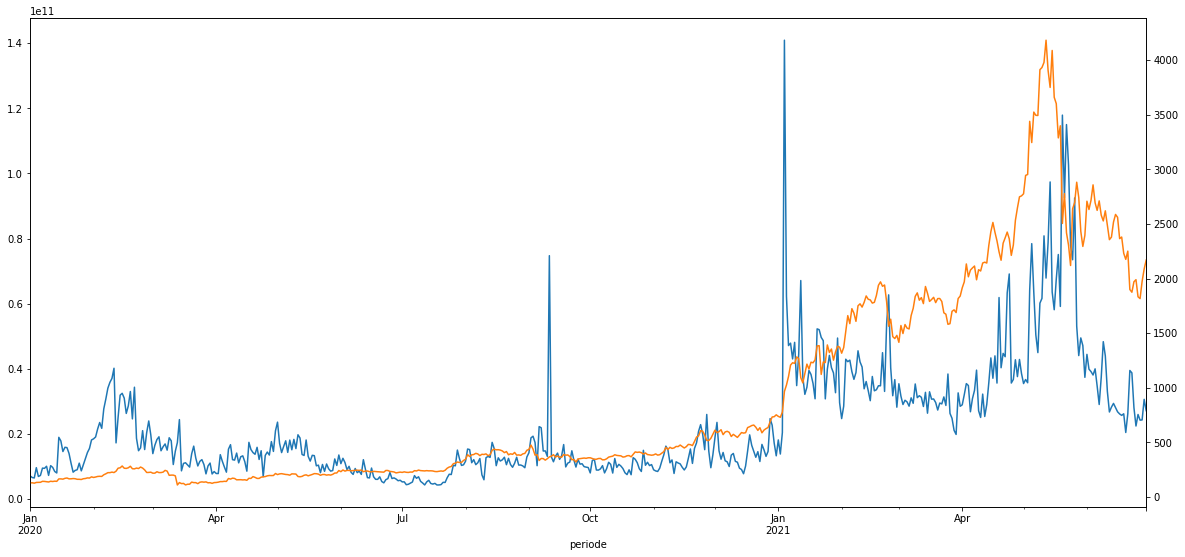

In [11]:
df_ethereum['volume'].plot(figsize = (20,9))
df_ethereum['open_price'].plot(secondary_y=True, figsize = (20,9))


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.